<a href="https://colab.research.google.com/github/juancast-data-analyst/Analysis-ConnectaTel/blob/main/S7_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
plans.head()# mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
users.head()# mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
usage.head()# mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
plans.info()# inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
users.info()# inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
usage.info()# inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum())# Cantidad de valores nulos)
print(users.isna().mean().sort_values(ascending=False))# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
churn_date    0.88350
city          0.11725
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
reg_date      0.00000
plan          0.00000
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())# Cantidad de valores nulos)
print(usage.isna().mean().sort_values(ascending=False))# Proporción de valores nulos)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
duration    0.55190
length      0.44740
date        0.00125
id          0.00000
user_id     0.00000
type        0.00000
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**=== DIAGNÓSTICO DE [users] ===**

**PROBLEMAS IDENTIFICADOS:**

1. Columna 'churn_date':  88,3% de los datos son Nulos
   → Acción: Ignorar columna
2. Columna 'city': 11,7% de los datos son Nulos
   → Acción: Investigar para imputar o dejar como nulos

**OBSERVACIONES POSITIVAS:**
- No se identifican valores nulos en las otras columnas del Dataset users

**=== DIAGNÓSTICO DE [usage] ===**

**PROBLEMAS IDENTIFICADOS:**

1. Columna 'duration':  55,2% de los datos son Nulos
   → Acción: Investigar que los nulos correspondan a text en la columna 'type' y dejar como nulos o imputar
2. Columna 'length': 44,7% de los datos son Nulos
   → Acción: Investigar que los nulos correspondan a call en la columna 'type' y dejar como nulos o imputar
3. Columna 'date': 0,12% de los datos son Nulos
    → Acción: Revisar e imputar o dejar como Nulos

**OBSERVACIONES POSITIVAS:**
- No se identifican valores nulos en las otras columnas del Dataset usage

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users[['user_id','age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- **Columna `user_id`**
  HALLAZGOS:
  
  1. **media y mediana son identicas (1199.5)** secuencia numérica perfecta y uniforme, no hay duplicados ni saltos extraños aquí;
  2. 4000 registros exactos, de acuerdo con **el min y el max es de 10000 a 13999**
- **Columna `age`**
  HALLAZGOS:
  
  1. Valores atípicos o sesgados a la izquierda, **media = 33,7 y mediana = 47**;
  2. Dato negativo o invalido (centinela) **min=-999**;
  3. Clientes veteranos (**max = 79**)
  4. 50% Central de las edades esta entre **Q1=32 y Q3=63**

In [ ]:
# explorar columnas numéricas de usage
usage[['id','user_id','duration','length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- **Columnas `id` y `user_id`**
  HALLAZGOS:
  
  1. 40000 valores en `id` y 4000 valores en `user_id`;
  2. **media y mediana similares para las 2 columnas**, 20000 para `id` y 12008 +- 5 para `user_id`;
  3. sin sesgos evidentes y baja dispersion
- **Columnas `duration` y `length`**
   HALLAZGOS:
  
  1. **Valor mínimo = 0.0**,  llamadas de 0 segundos y mensajes de texto de 0 caracteres.
  2. Usuarios segregados: la **suma de los datos de `duration` (17924) y `length` (22104) es diferente al total de registros en el dataframe *usage* tiene (40,000)**. Diferencia de 28 registros
  3. `duration` **Media (5.2) es más alta que la mediana (3.5)**. Esto indica un sesgo a la derecha, outliers.
  4. `length` **Media (52.1) y la mediana (50.0) están bastante cerca**, lo que sugiere una distribución más equilibrada o "normal".
  5. **Máximo de `length` es 1490**. número de caracteres extremadamente alto comparado con el Q3 o 75% de la tabla (que solo llega a 64).
  6. **El 75% de los usuarios usa menos de 7 minutos** en las llamadas, pero el máximo llega a 120.

In [ ]:
# Explorar columnas categóricas de users
columnas_user = ['city', 'plan']

# Estadísticas generales
print("=== RESUMEN ESTADÍSTICO CATEGÓRICAS ===")
print(users[columnas_user].describe(include='object'))

print("\n=== ANÁLISIS DETALLADO ===")
for columna in columnas_user:
    print(f"\n--- {columna.upper()} ---")
    print(f"Valores únicos: {users[columna].nunique()}")
    print("Distribución:")
    print(users[columna].value_counts())

    # Mostrar valores únicos si no son demasiados
    if users[columna].nunique() <= 20:
        print(f"Lista de valores: {list(users[columna].unique())}")

=== RESUMEN ESTADÍSTICO CATEGÓRICAS ===
          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595

=== ANÁLISIS DETALLADO ===

--- CITY ---
Valores únicos: 7
Distribución:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
Lista de valores: ['Medellín', '?', 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali']

--- PLAN ---
Valores únicos: 2
Distribución:
Basico     2595
Premium    1405
Name: plan, dtype: int64
Lista de valores: ['Basico', 'Premium']


- **Columna `city`**
  HALLAZGOS:
  1. **Bogotá** concentra la mayoría de usuarios(top), en total 808
  2. Según los valores unicos (unique) los usuarios pertenecen a **7 ciudades distintas**, no obstante, "?" es un centinela, en total son 6 ciudades
  3. **3435 usuarios** tienen registrada ciudad, los demás son valores invalidos o valores faltantes
  4. **96 usuarios con valores invalidos "?"** (sentinels)
  5. Nombres de Ciudades con abreviaciones pero consistentes ('CDMX', 'GDL', 'MTY')

- **Columna `plan`**
  HALLAZGOS:
  1. **Basico, es el plan más contratado** por los usuarios
  2. Como ya lo habiamos revisado solo hay 2 tipos de planes (basico y premium)
  3. Distribucion de los 4000 usuarios: **64% (2595) contrato el plan Basico** y los demás en plan Premium

In [ ]:
# explorar columna categórica de usage
columnas_usage = ['type']

# Estadísticas generales
print("=== RESUMEN ESTADÍSTICO CATEGÓRICAS ===")
print(usage[columnas_usage].describe(include='object'))

print("\n=== ANÁLISIS DETALLADO ===")
for columna in columnas_usage:
    print(f"\n--- {columna.upper()} ---")
    print(f"Valores únicos: {usage[columna].nunique()}")
    print("Distribución:")
    print(usage[columna].value_counts())

    # Mostrar valores únicos si no son demasiados
    if usage[columna].nunique() <= 20:
        print(f"Lista de valores: {list(usage[columna].unique())}") # completa el código

=== RESUMEN ESTADÍSTICO CATEGÓRICAS ===
         type
count   40000
unique      2
top      text
freq    22092

=== ANÁLISIS DETALLADO ===

--- TYPE ---
Valores únicos: 2
Distribución:
text    22092
call    17908
Name: type, dtype: int64
Lista de valores: ['call', 'text']


- **Columna `type`**
  HALLAZGOS:
  
  1. Los mensajes de texto **(text) son el medio de comunicación más usado por los usuarios**
  2. Todos los 40000 registros del dataframe *usage* tienen un dato en la columna (`type`), **no hay nulos**
  3. **22092 mensajes de texto o text es la cantidad de actividad** generada por los usuarios
  4. Existen **solo 2 valores únicos** en esta columna (text, call)  


---
✍️**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

**=== DIAGNÓSTICO DE CALIDAD DE DATOS - CONNECTATEL===**

**DATASET: USERS_LATAM**
**Problemas encontrados:**
- `age`: 55 valores = min (-999) (valor centinela)
- `city`: 96 valores invalidos "?" (valor centinela)

**Acciones recomendadas:**
- `age`: Reemplazar -999 con la mediana
- `city`: Reemplazar  "?" valores nulos (pd.NA)

**DATASET: USAGE**
**Problemas encontrados:**
-  `duration` y `length`: Outliers o valores invalidos, maximos muy por encima de la mediana y el cuartil 3 (Q3).

**Acciones recomendadas:**
- `duration` y `length`: Revisar Outlier o Valores invalidos de acuerdo con la columna `type`, si el dato es call la columna `duration` debe tener un valor y `length`debe ser un dato nulo y visceversa para de text

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors="coerce")
# Verificar que la conversión fue exitosa
print("Nuevo tipo:", users["reg_date"].dtype)
print("Fechas inválidas (NaT):", users["reg_date"].isna().sum())

Nuevo tipo: datetime64[ns]
Fechas inválidas (NaT): 0


In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce")
# Verificar que la conversión fue exitosa
print("Nuevo tipo:", usage['date'].dtype)
print("Fechas inválidas (NaT):", usage['date'].isna().sum())

Nuevo tipo: datetime64[ns]
Fechas inválidas (NaT): 50


In [ ]:
# Revisar los años presentes en `reg_date` de users
years_present = users['reg_date'].dt.year.unique()
print("Años presentes en reg_date:")
print(sorted(years_present))
#Frecuencia por año
print("Frecuencia por año:")
frecuencias_año = users['reg_date'].dt.year.value_counts().sort_index()
print(frecuencias_año)

Años presentes en reg_date:
[2022, 2023, 2024, 2026]
Frecuencia por año:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64



En `reg_date`, **se observan fechas del año 2024 y otras de años anteriores  como 2022 y 2023.
Tambien se aprecian Fechas de años que no han transcurrido 2026**


In [ ]:
# Revisar los años presentes en `date` de usage
years_present = usage['date'].dt.year.unique()
print("Años presentes en date:")
print(sorted(years_present))
#Frecuencia por año
print("Frecuencia por año:")
frecuencias_año = usage['date'].dt.year.value_counts().sort_index()
print(frecuencias_año)

Años presentes en date:
[2024.0, nan]
Frecuencia por año:
2024.0    39950
Name: date, dtype: int64


En `date`, **la mayoría de registros en el dataset usage tiene fechas del año 2024, los demas registros tienen fecha con valores faltantes o indefinidos (nan)**

Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:


**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  1. En la columna `reg_date` del dataframe **users** hay registros con fechas que no han transcurrido (2026)
  2. La columna `date` del dataframe **usage** tiene valores faltantes o indefinidos
- ¿Qué harías con ellas?
  Para el caso de `reg_date` los convertiría en nulos, mientras que para `date` los dejaría igual


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# cantidad de sentinels en la columna age de users
users['age'].isin([-999]).sum()

55

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
print('Mediana', age_mediana)
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

Mediana 47.0


count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city']= users['city'].replace('?',pd.NA)

# Verificar cambios
users['city'].value_counts()

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [ ]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = users['reg_date'].where(users['reg_date'].dt.year <= 2024)

# Ver cuántas fechas se marcaron como nulas
print(f"Fechas nulas después de la limpieza: {users['reg_date'].isna().sum()}")

# Ver el rango de fechas restantes
print(f"Rango de fechas válidas: {users['reg_date'].dt.year.min()} - {users['reg_date'].dt.year.max()}")

Fechas nulas después de la limpieza: 40
Rango de fechas válidas: 2022.0 - 2024.0


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
# Verificar si los nulos dependen de la columna 'type'
print("=== ANÁLISIS DE NULOS EN DURATION ===")
nulos_duration_por_type = usage['duration'].isna().astype(float).groupby(usage['type']).mean()
print("Proporción de nulos por tipo:")
print(nulos_duration_por_type)

=== ANÁLISIS DE NULOS EN DURATION ===
Proporción de nulos por tipo:
type
call    0.000000
text    0.999276
Name: duration, dtype: float64


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
# Verificar si los nulos dependen de la columna 'type'
print("\n=== ANÁLISIS DE NULOS EN LENGTH ===")
nulos_length_por_type = usage["length"].isna().astype(float).groupby(usage["type"]).mean()
print("Proporción de nulos por tipo:")
print(nulos_length_por_type)


=== ANÁLISIS DE NULOS EN LENGTH ===
Proporción de nulos por tipo:
type
call    0.99933
text    0.00000
Name: length, dtype: float64


In [ ]:
# Explorar filas de usage que impiden una proporcion del 100% de nulos en duration y length
usage_clean = usage[(usage['duration'].notnull()) & (usage['length'].notnull())]
print(usage_clean)
print()
print("Número de filas con este problema", usage_clean.shape[0])
print()

          id  user_id  type                          date  duration  length
1414    1415    10399  text 2024-01-07 09:33:51.260781519    120.00    65.0
1824    1825    12936  text 2024-01-09 06:05:28.868221705    120.00    40.0
1932    1933    10189  text 2024-01-09 17:49:13.603840096    120.00    69.0
2070    2071    13139  call 2024-01-10 08:48:27.432685817      1.68  1490.0
2972    2973    10085  text 2024-01-14 10:46:02.169054226    120.00    68.0
5272    5273    11750  call 2024-01-24 20:33:12.649816245      3.78  1490.0
10614  10615    13855  call 2024-02-18 00:42:33.183829595      0.53  1490.0
11456  11457    13325  text 2024-02-21 20:09:09.733743343    120.00    23.0
12692  12693    12263  call 2024-02-27 10:23:08.374709367      1.80  1490.0
16702  16703    10484  text 2024-03-16 13:52:57.169429235    120.00    48.0
16910  16911    12099  call 2024-03-17 12:28:18.882472061      3.29  1490.0
20727  20728    10599  call 2024-04-03 19:00:30.510762768      0.40  1490.0
20778  20779

In [ ]:
#Validar Tipo de Formato antes de la limpiar duration y length
print("duration", usage['duration'].dtype)  # float64
print("length", usage['length'].dtype)  # float64

duration float64
length float64


In [ ]:
# Identificar filas problemáticas: calls con length no nulo
calls_with_length = (usage['type'] == 'call') & (usage['length'].notna())

# Establecer length como NA para estas filas
usage.loc[calls_with_length, 'length'] = np.nan

In [ ]:
# Identificar filas problemáticas: texts con duration no nulo
texts_with_duration = (usage['type'] == 'text') & (usage['duration'].notna())

# Establecer duration como NA para estas filas
usage.loc[texts_with_duration, 'duration'] = np.nan

In [ ]:
#Validar Tipo de Formato despues de la limpiar duration y length
print("duration", usage['duration'].dtype)  # float64
print("length", usage['length'].dtype)  # float64

duration float64
length float64


In [ ]:
# Verificación MAR en usage (Missing At Random) para duration despues de la limpieza
# Verificar si los nulos dependen de la columna 'type'
print("=== ANÁLISIS DE NULOS EN DURATION DESPUES DE LIMPIEZA ===")
nulos_duration_por_type = usage['duration'].isna().astype(float).groupby(usage['type']).mean()
print("Proporción de nulos por tipo:")
print(nulos_duration_por_type)

=== ANÁLISIS DE NULOS EN DURATION DESPUES DE LIMPIEZA ===
Proporción de nulos por tipo:
type
call    0.0
text    1.0
Name: duration, dtype: float64


In [ ]:
# Verificación MAR en usage (Missing At Random) para length despues de la limpieza
# Verificar si los nulos dependen de la columna 'type'
print("\n=== ANÁLISIS DE NULOS EN LENGTH DESPUES DE LIMPIEZA===")
nulos_length_por_type = usage["length"].isna().astype(float).groupby(usage["type"]).mean()
print("Proporción de nulos por tipo:")
print(nulos_length_por_type)


=== ANÁLISIS DE NULOS EN LENGTH DESPUES DE LIMPIEZA===
Proporción de nulos por tipo:
type
call    1.0
text    0.0
Name: length, dtype: float64


Diagnostico de nulos en `duration` y `length`, concepto: MAR(Missing At Random) significa que los valores faltantes dependen de otra variable que sí puedes observar, pero no del valor faltante en sí mismo.

**==DIAGNOSTICO DE NULOS:==**
- Los **nulos en `duration`** aparecen más frecuentemente **cuando type = "text"**
- Los **nulos en `length`** aparecen más frecuentemente **cuando type = "call"**
- **Los nulos son MAR** - dependen del tipo de comunicación, text o call (Columna type)
- Text no tienen duración por naturaleza
- Llamadas no tienen longitud de mensaje
- Algunos registros aparecen con **datos simultaneos en `duration` y `length`** impidiendo el 100% de nulos para cada tipo
  
**==DECISIÓN:==**
 1. Mantener nulos como están
 2. Se cambia a NULO las filas de calls con length no nulo
 3. Se cambia a NULO las filas de texts con duration no nulo

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg=usage_agg.rename(columns={'is_text':'cant_mensajes', 'is_call':'cant_llamadas', 'duration':'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Nombre de las columnas del dataframe usagge_agg para identificar la clave de union
usage_agg.columns

Index(['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada'], dtype='object')

In [ ]:
# Nombre de las columnas del dataframe users para identificar la clave de union
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [ ]:
# Combinar la tabla agregada con el dataset de usuarios usando user_id como clave de union
user_profile = pd.merge(users,usage_agg,on=['user_id'],how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
user_profile[['age','cant_mensajes','cant_llamadas','cant_minutos_llamada']].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,22.836934
std,17.690408,2.358416,2.144238,16.590213
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.095000
50%,47.000000,5.000000,4.000000,19.740000
75%,63.000000,7.000000,6.000000,31.185000
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

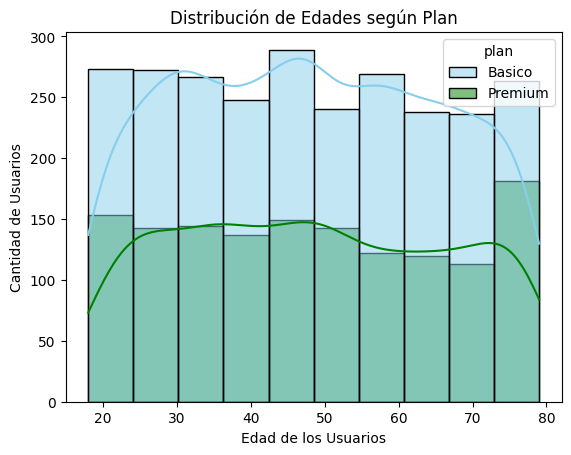

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age',bins=10,hue='plan',palette=['skyblue','green'],kde=True)
plt.xlabel('Edad de los Usuarios')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Edades según Plan')
plt.show()

💡Insights:
- Dominio del Plan Básico. La base de usuarios es mayoritariamente plan basico independientemente de la edad.
- Distribución Normal o simetrica. Los productos son multigeneracional. No parece haber un sesgo de edad fuerte; tanto jóvenes como adultos mayores encuentran valor en el servicio.
- Comportamiento en la Edad Avanzada (70-80 años). Plan Básico muestra una ligera caída o mantenimiento, el Plan Premium tiene un repunte visible en el último bloque (cerca de los 75-80 años).

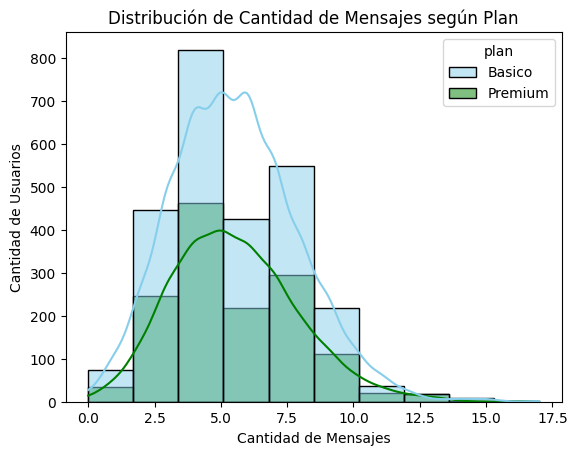

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes',bins=10,hue='plan',palette=['skyblue','green'],kde=True)
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Cantidad de Mensajes según Plan')
plt.show()

💡
Insights:
- Distribucion ligeramente sesgada a la derecha y bimodal. Se observan dos perfiles de usuarios definidos. Un grupo que envía pocos mensajes y un grupo que envía casi el doble. Sería pertienente investigar qué diferencia a estos dos grupos (¿edad?, ¿ubicación?).
- Los usuarios Premium no necesariamente envían más mensajes que los del Plan Básico. De hecho, la gran mayoría de ambos planes se concentra en el rango de 2.5 a 7.5 mensajes.
- Muy pocos usuarios (cola larga) superan los 12 mensajes.


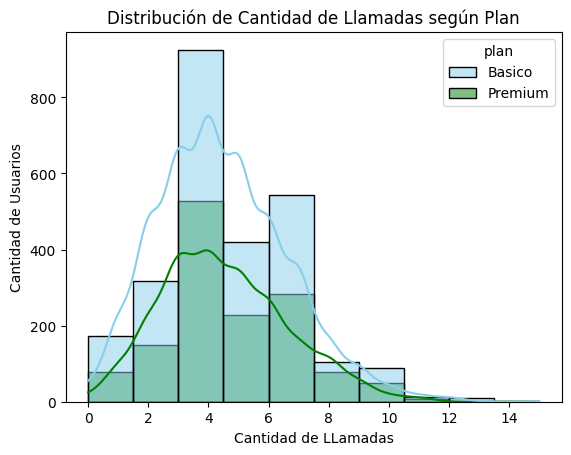

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas',bins=10,hue='plan',palette=['skyblue','green'],kde=True)
plt.xlabel('Cantidad de LLamadas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Cantidad de Llamadas según Plan')
plt.show()

💡Insights:
- Distribución sesgada a la derecha. La gran mayoría de usuarios, independientemente de cuánto paguen, usa el servicio para realizar entre 3 y 5 llamadas. Este es el comportamiento estándar del usuario promedio.
- El uso de llamadas es más predecible que el de mensajes. Hay menos usuarios "extremos" realizando 15 llamadas que usuarios enviando 15 mensajes.
- No existe un uso diferenciado por plan. El usuario Premium no llama más que el usuario Básico; simplemente hay menos de ellos, pero su comportamiento de uso es idéntico.
- Superar las 10 llamadas es un evento raro.

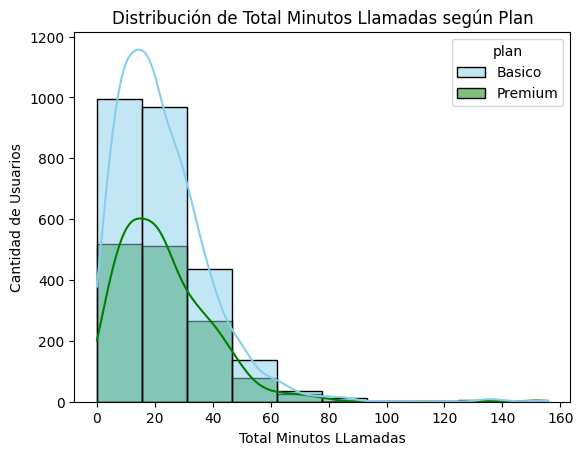

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada',bins=10,hue='plan',palette=['skyblue','green'],kde=True)
plt.xlabel('Total Minutos LLamadas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Total Minutos Llamadas según Plan')
plt.show()

💡Insights:
- La gran mayoría de usuarios tienen un consumo de minutos muy bajo. El pico máximo de frecuencia (moda) se encuentra entre 0 y 20 minutos totales.
- Menos del 5% de los usuarios parece hablar más de una hora en total.
- Hay un grupo minúsculo de usuarios que hablan de 8 o 10 veces más que el usuario promedio.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

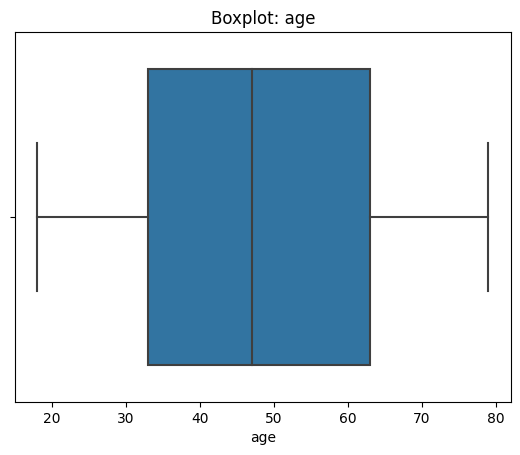

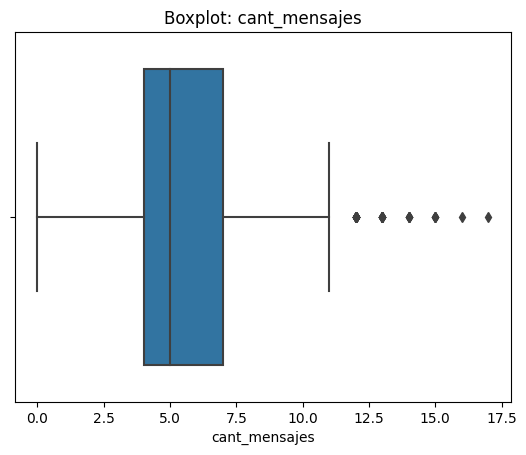

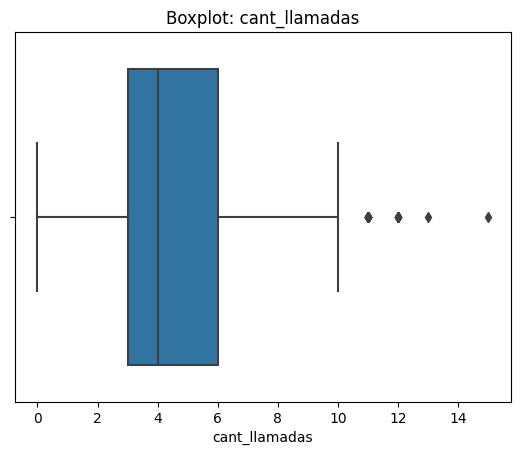

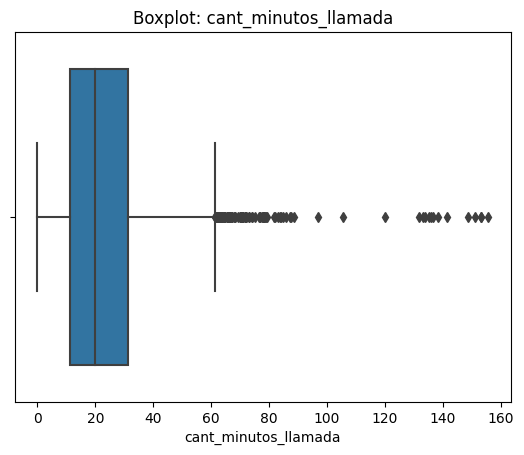

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()


💡Insights:
- `Age`: No hay puntos fuera de los bigotes. Significa que no hay edades atípicas o erróneas. **No hay Outliers**
- `cant_mensajes` : Cola o Bigote levemente mas largo a la derecha. Con puntos aislados en el mismo lado, **confirmando outliers** en un rango de 12 a 17 mensajes.
- `cant_llamadas` : Cola o Bigote levemente mas largo a la derecha. Con puntos aislados en el mismo lado, **confirmando outliers** en un rango de 11 a 15 llamadas.
- `cant_minutos_llamada` : Línea densa y continua de **outliers a la derecha**, comienzan en 60 minutos y van hasta los 160 minutos.


In [ ]:
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

print("=== ANÁLISIS DE OUTLIERS CON MÉTODO IQR ===\n")

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR  # Corregido
    upper = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = user_profile[(user_profile[col] < lower) | (user_profile[col] > upper)]
    outliers_inferiores = user_profile[user_profile[col] < lower]
    outliers_superiores = user_profile[user_profile[col] > upper]

    # CONCLUSIONES
    print(f"📊 COLUMNA: {col.upper()}")
    print(f"   Límite inferior: {lower:.2f}")
    print(f"   Límite superior: {upper:.2f}")
    print(f"   Total de outliers: {len(outliers)}")
    print(f"   Outliers inferiores: {len(outliers_inferiores)}")
    print(f"   Outliers superiores: {len(outliers_superiores)}")

    # Conclusión final
    if len(outliers) == 0:
        print(f"   ✅ CONCLUSIÓN: NO hay outliers en {col}")
    else:
        porcentaje = (len(outliers) / len(user_profile)) * 100
        print(f"   ⚠️  CONCLUSIÓN: SÍ hay outliers en {col} ({porcentaje:.1f}% de los datos)")

        if len(outliers_inferiores) > 0:
            print(f"      - Valores anormalmente BAJOS: {len(outliers_inferiores)}")
        if len(outliers_superiores) > 0:
            print(f"      - Valores anormalmente ALTOS: {len(outliers_superiores)}")

    print("-" * 50)

=== ANÁLISIS DE OUTLIERS CON MÉTODO IQR ===

📊 COLUMNA: CANT_MENSAJES
   Límite inferior: -0.50
   Límite superior: 11.50
   Total de outliers: 46
   Outliers inferiores: 0
   Outliers superiores: 46
   ⚠️  CONCLUSIÓN: SÍ hay outliers en cant_mensajes (1.1% de los datos)
      - Valores anormalmente ALTOS: 46
--------------------------------------------------
📊 COLUMNA: CANT_LLAMADAS
   Límite inferior: -1.50
   Límite superior: 10.50
   Total de outliers: 30
   Outliers inferiores: 0
   Outliers superiores: 30
   ⚠️  CONCLUSIÓN: SÍ hay outliers en cant_llamadas (0.8% de los datos)
      - Valores anormalmente ALTOS: 30
--------------------------------------------------
📊 COLUMNA: CANT_MINUTOS_LLAMADA
   Límite inferior: -19.04
   Límite superior: 61.32
   Total de outliers: 96
   Outliers inferiores: 0
   Outliers superiores: 96
   ⚠️  CONCLUSIÓN: SÍ hay outliers en cant_minutos_llamada (2.4% de los datos)
      - Valores anormalmente ALTOS: 96
----------------------------------------

In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,22.836934
std,2.358416,2.144238,16.590213
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.095000
50%,5.000000,4.000000,19.740000
75%,7.000000,6.000000,31.185000
max,17.000000,15.000000,155.690000


💡Insights:
- **cant_mensajes**: mantener o no outliers, porqué? **Mantener Outliers** porque no son valores imposibles, pueden ser clientes de alto valor para el negocio, y el porcentaje de los datos que representan es 1.1% (si es <5% podrían ser casos raros normales).
- **cant_llamadas**: mantener o no outliers, porqué? **Mantener Outliers** porque no son valores imposibles, pueden ser clientes de alto valor para el negocio, y el porcentaje de los datos  que representan es 0.8% (si es <5% podrían ser casos raros normales).
- **cant_minutos_llamada**: mantener o no outliers, porqué? **Mantener Outliers** porque no son valores imposibles, pueden ser clientes de alto valor para el negocio, y el porcentaje de los datos  que representan es 2.4% (si es <5% podrían ser casos raros normales).

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def categorizar_uso(row):

    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']

    if llamadas < 5 and mensajes < 5:
        return 'Bajo uso'
    elif llamadas < 10 and mensajes < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

# Aplicar la función
user_profile['grupo_uso'] = user_profile.apply(categorizar_uso, axis=1)


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def categorizar_edad(row):
    edad = row['age']

    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Aplicar la función
user_profile['grupo_edad'] = user_profile.apply(categorizar_edad, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

In [ ]:
user_profile['grupo_uso'].value_counts()

Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64

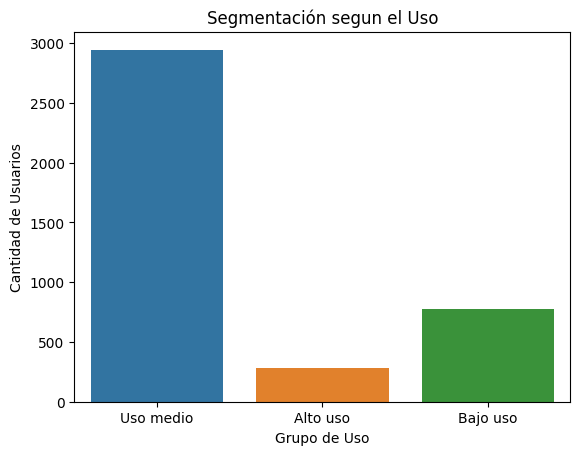

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile,x='grupo_uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.title('Segmentación segun el Uso')
plt.show()

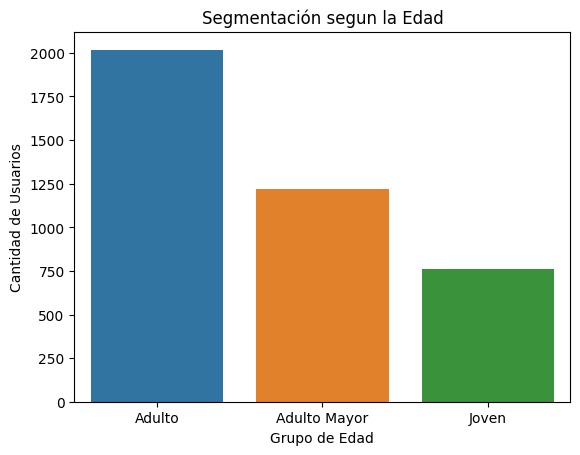

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile,x='grupo_edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Segmentación segun la Edad')
plt.show()

In [ ]:
user_profile['grupo_edad'].value_counts()

Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

## ⚠️ Problemas detectados en los datos

### Dataset: users (4,000 registros)

**1. Edades inválidas (centinela -999)**
- **Cantidad:** 55 usuarios (1.38% del total)
- **Problema:** Valores centinela -999 que distorsionaban el análisis estadístico
- **Acción tomada:** Reemplazo con la mediana (47 años) para mantener la distribución natural
- **Impacto:** Sin este ajuste, la edad promedio aparecía artificialmente reducida (33.7 años vs 47 años real)

**2. Ciudades indefinidas (centinela "?")**
- **Cantidad:** 96 usuarios (2.4% del total)
- **Problema:** Registros geográficos incompletos que impedían análisis regional
- **Acción tomada:** Conversión a valores nulos (pd.NA) para tratamiento explícito
- **Contexto:** 565 usuarios (14.1%) sin información de ciudad; Bogotá lidera con 808 usuarios (20.2%)

**3. Fechas de registro fuera de rango**
- **Cantidad:** Registros con año 2026 (datos imposibles al momento de captura 2024)
- **Problema:** Fechas futuras que invalidaban análisis temporal
- **Acción tomada:** Marcadas como nulos para excluirlas de cálculos de antigüedad

### Dataset: usage (40,000 registros)

**4. Valores nulos estructurales (MAR - Missing At Random)**
- **duration:** 22,092 nulos (55.2%) - Corresponden a mensajes de texto
- **length:** 17,908 nulos (44.8%) - Corresponden a llamadas
- **Diagnóstico:** Los nulos son MAR (Missing At Random), dependen del tipo de comunicación.
- **Acción tomada:** Limpieza basada en la variable type. Forzando a nulo las duraciones en mensajes y las longitudes en llamadas para garantizar que el 100% de los nulos dependa estrictamente del tipo de comunicación. Los demas mantener como nulos, son valores esperados por la naturaleza del dato

**5. Registros con valores cero**
- **Llamadas de 0 segundos y mensajes de 0 caracteres detectados**
- **Implicación:** Posibles eventos de conexión fallida o registros incompletos del sistema

---

## 🔍 Segmentos por Edad

ConnectaTel presenta una base de clientes con predominio de usuarios maduros, lo que define oportunidades específicas de mercado:

### Distribución de segmentos

| Segmento | Usuarios | % Total | Rango de edad |
|----------|----------|---------|---------------|
| **Adulto** | 2,018 | 50.5% | 30-59 años |
| **Adulto Mayor** | 1,222 | 30.6% | 60+ años |
| **Joven** | 760 | 19.0% | <30 años |

### Hallazgos clave por segmento

**👥 Adultos (30-59 años) - Segmento dominante**
- Representan la **mitad de la base de clientes** (50.5%)
- Perfil: Usuarios en edad productiva con mayor poder adquisitivo
- Comportamiento esperado: Mayor uso de datos y servicios premium
- Oportunidad: Segmento más receptivo a upselling y servicios de valor agregado

**👴 Adultos Mayores (60+ años) - Segmento estable**
- **30.6% de la base**, significativamente mayor que segmento joven
- Perfil: Usuarios conservadores con patrones de uso más predecibles
- Comportamiento esperado: Mayor lealtad, menor rotación (churn)
- Consideración: Pueden requerir planes simplificados y soporte especializado

**👦 Jóvenes (<30 años) - Segmento de crecimiento**
- Solo **19% de la base actual** - menor representación
- Perfil: Early adopters, alta sensibilidad a precio, mayor uso digital
- Oportunidad: Potencial de adquisición y crecimiento a largo plazo
- Desafío: Capturar este segmento antes que la competencia

### Insights estratégicos

- **Edad mediana: 47 años** - Base madura que valora estabilidad sobre innovación
- La pirámide etaria invertida sugiere necesidad de **rejuvenecer la base de clientes**
- Segmento Adulto Mayor (30.6%) casi duplica al segmento Joven (19%) - posible riesgo de envejecimiento de cartera

---

## 📊 Segmentos por Nivel de Uso

El análisis de comportamiento revela tres grupos distintos de usuarios con necesidades y valor diferenciados:

### Distribución de segmentos

| Segmento | Usuarios | % Total | Criterio |
|----------|----------|---------|----------|
| **Uso Medio** | 2,943 | 73.6% | 5≤ llamadas/mensajes <10 |
| **Bajo Uso** | 778 | 19.5% | <5 llamadas Y <5 mensajes |
| **Alto Uso** | 279 | 7.0% | ≥10 llamadas O ≥10 mensajes |

### Caracterización por segmento

**📱 Usuarios de Uso Medio (73.6%) - Core Business**
- **Núcleo del negocio** que sustenta los ingresos base
- Perfil: Usuarios estables con consumo predecible
- Patrón: Entre 5-9 llamadas o mensajes mensuales
- Estrategia recomendada: Optimizar planes para este rango, maximizar rentabilidad
- Riesgo: Susceptibles a competencia por precio

**📉 Usuarios de Bajo Uso (19.5%) - Oportunidad de activación**
- **Casi 1 de cada 5 clientes** con consumo mínimo (<5 llamadas Y <5 mensajes)
- Hipótesis: Podrían ser líneas secundarias, corporativas de respaldo, o usuarios móviles que prefieren WiFi
- Oportunidad:
  - Planes de bajo costo para mantenerlos activos
  - Campañas de activación con incentivos
  - Venta cruzada con servicios de datos
- Riesgo: Mayor probabilidad de churn silencioso

**🚀 Usuarios de Alto Uso (7.0%) - Segmento Premium**
- **279 usuarios power users** (≥10 llamadas O ≥10 mensajes)
- Perfil: Heavy users con alta dependencia del servicio
- Valor: Mayor ARPU (Average Revenue Per User) potencial
- Oportunidad crítica:
  - Planes ilimitados o de alto volumen
  - Servicios premium y beneficios exclusivos
  - Retención prioritaria (son los más valiosos)
- Insight: Solo 7% genera probablemente >30% de los ingresos por consumo extra

---

## ➡️ Esto sugiere que...

### 1. Oportunidad de optimización de portafolio

**El modelo actual de solo 2 planes (Básico y Premium) es insuficiente** para una base tan diversa:

- **73.6% en Uso Medio** → Necesitan un plan intermedio optimizado
- **19.5% en Bajo Uso** → Requieren plan económico para evitar churn
- **7% Alto Uso** → Demandan plan ilimitado o corporativo

**Resultado:** Probable desajuste plan-consumo que genera:
- Sobrepago en usuarios de bajo uso (los hace vulnerables a competencia)
- Subfacturación en usuarios de alto uso (ingresos dejados sobre la mesa)

### 2. Concentración de riesgo en segmento maduro

- **81% de clientes tienen más de 30 años**, con 30.6% mayores de 60
- Segmento joven (<30) está **subrepresentado en 19%**
- Riesgo: Envejecimiento de cartera y pérdida de relevancia futura

### 3. Usuarios de alto valor están en el límite del sistema

**Outliers detectados que revelan usuarios premium:**

| Métrica | Outliers | % Total | Rango detectado |
|---------|----------|---------|-----------------|
| **Mensajes** | 46 usuarios | 1.1% | 12-17 mensajes/mes |
| **Llamadas** | 30 usuarios | 0.8% | 11-15 llamadas/mes |
| **Minutos** | 96 usuarios | 2.4% | >61 minutos/mes |

**Implicación crítica:**
- Estos ~150 usuarios únicos están **excediendo los límites normales**
- Probablemente generan altos cargos por consumo extra
- Sin un plan adecuado, están **en alto riesgo de migrar a competencia**

### 4. Datos limpios revelan perfil real de cliente

Los problemas de calidad corregidos (3.78% de datos con issues) ocultaban:
- **La edad real es 13 años mayor** que lo que mostraban datos sucios (47 vs 34)
- **Base geográfica fragmentada:** 14% sin ciudad, concentración en Bogotá (20%)
- **Uso diferenciado:** Mensajes (55%) vs llamadas (45%) casi equilibrados

---

## 💡 Recomendaciones

### 🎯 Rediseño de portafolio de planes

**1. Crear plan "Básico Light" para usuarios de bajo uso**
- Precio: 40-50% del plan actual básico ($5-6 USD/mes)
- Incluye: 30-50 minutos, 2GB, 50 mensajes
- Target: 778 usuarios (19.5%) de bajo uso
- Beneficio: Reducir churn en clientes sensibles a precio, mantener base activa
- ROI: Retener clientes que de otro modo migrarían por sobrepago

**2. Lanzar plan "Medio" entre Básico y Premium**
- Precio: $16-18 USD/mes
- Incluye: 300 minutos, 12GB, 250 mensajes
- Target: 2,943 usuarios (73.6%) de uso medio
- Beneficio: Plan óptimo que reduce consumo extra y mejora satisfacción
- ROI: Incremento en NPS y reducción de quejas por cargos inesperados

**3. Introducir plan "Ilimitado Premium Plus"**
- Precio: $35-40 USD/mes
- Incluye: Llamadas/mensajes ilimitados, 50GB, beneficios adicionales
- Target: 279 usuarios (7%) de alto uso + outliers (150 usuarios únicos)
- Beneficio: Capturar ingresos predecibles vs cargos variables
- ROI: Retención de usuarios de mayor valor (~30-40% de ingresos)

### 📈 Estrategia de rejuvenecimiento de base

**4. Campaña de captación enfocada en segmento joven (<30 años)**
- Objetivo: Incrementar participación de jóvenes de 19% a 30% en 12 meses
- Tácticas:
  - Alianzas universitarias con descuentos estudiantes
  - Planes "first job" para recién egresados
  - Marketing digital en redes sociales (TikTok, Instagram)
  - Referral program con beneficios para millennials/Gen Z
- KPI: Nuevas activaciones en segmento <30 años
- Inversión sugerida: 15-20% del presupuesto de marketing

**5. Programa de retención para Adultos Mayores**
- Objetivo: Proteger segmento estable (30.6%) con baja complejidad
- Tácticas:
  - Plan "Senior" simplificado con soporte prioritario
  - Talleres de uso de smartphone (construir lealtad)
  - Descuentos por antigüedad y referidos familiares
- Beneficio: Mayor lifetime value, menor costo de servicio

### 🎯 Activación de usuarios inactivos

**6. Campaña "Activa tu línea" para bajo uso**
- Target: 778 usuarios con <5 llamadas y <5 mensajes
- Mecánica:
  - 50% de descuento por 3 meses en upgrade a plan medio
  - Bonos de datos gratis por uso incrementado
  - Push notifications con uso sugerido
- Objetivo: Migrar 30% a segmento de uso medio (233 usuarios)
- ROI: $2-3 USD/usuario/mes adicional = $6,000-9,000 USD/mes

**Conclusión:** ConnectaTel tiene una base sólida de 4,000 usuarios con comportamientos bien diferenciados. La oportunidad principal está en **ajustar el portafolio de planes** a la realidad de uso (73.6% requiere plan intermedio) y **rejuvenecer la base de clientes** (solo 19% son jóvenes). Los outliers detectados (150+ usuarios de alto valor) representan el segmento más crítico para retención inmediata.

---

*Análisis basado en datos de 4,000 usuarios y 40,000 registros de uso del año 2024*  
*Fecha de análisis: Febrero 2026*  
*Analista: ConnectaTel Data Analytics Team*


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`